## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


def wildeford_max_gdp_frac():
    small_project = sq.lognorm(1 / (250*K), 1 / (3*K))
    modern_megaproject = sq.lognorm(1/K, 1/600)
    old_form_megaproject = sq.lognorm(1/500, 1/150)
    gigaproject = sq.lognorm(1/150, 1/50)
    
    r_ = random.random()
    if r_ < 0.1:
        gdp_frac = small_project
        percent_spent_on_compute = sq.lognorm(0.2,0.6, lclip=0.1, rclip=0.9)
    elif r_ < 0.8:
        gdp_frac = modern_megaproject
        percent_spent_on_compute = sq.lognorm(0.4,0.7, lclip=0.1, rclip=0.9)
    elif r_ < 0.95:
        gdp_frac = old_form_megaproject
        percent_spent_on_compute = sq.lognorm(0.5,0.9, lclip=0.1, rclip=0.9)
    else:
        gdp_frac = gigaproject
        percent_spent_on_compute = sq.lognorm(0.6,0.9, lclip=0.1, rclip=0.9)

    return ~gdp_frac * ~percent_spent_on_compute


variables = {'initial_gdp': 23*T,
            'tai_flop_size': sq.sample(load_cache_file='caches/meta_anchor'),  # Cache generated in "Anchors" notebook
            'algo_doubling_rate_max': 3.5,
            'algo_doubling_rate_min': 2,
            'min_reduction': 2,
            'max_reduction': 5,
            'initial_flops_per_dollar': 18,
            'flops_halving_rate': 2.5,
            'max_flops_per_dollar': 24,
            'initial_pay': 8.7,
            'gdp_growth': 1.03,
            'max_gdp_frac': 0.01,
            'spend_doubling_time': 2.5}



"""
VARIABLE_SETS['Wildeford']['flops_halving_rate'] = sq.lognorm(2, 5)
VARIABLE_SETS['Wildeford']['initial_pay'] = sq.mixture([[0.8, sq.const(7.1)],
                                                        [0.2, sq.lognorm(7.1,9, lclip=7.1)]]) #NEW
VARIABLE_SETS['Wildeford']['gdp_growth'] = sq.lognorm(1.015, 1.035) #NEW
VARIABLE_SETS['Wildeford']['max_gdp_frac'] = wildeford_max_gdp_frac #NEW
VARIABLE_SETS['Wildeford']['spend_doubling_time'] = sq.mixture([[0.8, sq.lognorm(3,6)],
                                                                [0.2, sq.lognorm(1,2, lclip=1)]]) #NEW
# TODO: Willingness to spend connected to commercialization
VARIABLE_SETS['Wildeford']['initial_chance_of_nonscaling_issue'] = 0.95 #NEW
VARIABLE_SETS['Wildeford']['final_chance_of_nonscaling_issue'] = 0.3 #NEW
VARIABLE_SETS['Wildeford']['nonscaling_issue_bottom_year'] = 2050 #NEW
VARIABLE_SETS['Wildeford']['nonscaling_delay'] = sq.mixture([[0.7, sq.lognorm(2,10)],
                                                             [0.3, sq.lognorm(5,40)]]) #NEW
VARIABLE_SETS['Wildeford']['algo_doubling_rate_max'] = sq.norm(1,3) # NEW
VARIABLE_SETS['Wildeford']['algo_doubling_rate_min'] = sq.norm(1,2) # NEW
VARIABLE_SETS['Wildeford']['min_reduction'] = 2 # TODO: Connect to efficiency within tai_flop_size / should correlate with tai_flop_size
VARIABLE_SETS['Wildeford']['max_reduction'] = 5
"""
print('Loaded')


Loaded


## Run Wildeford timelines model

## TAI FLOP SIZE ##
{1: 19.1,
 5: 23.9,
 10: 25.2,
 20: 26.8,
 30: 28.7,
 40: 30.5,
 50: 32.4,
 60: 34.4,
 70: 36.5,
 80: 39.1,
 90: 42.6,
 95: 45.8,
 99: 52.4}


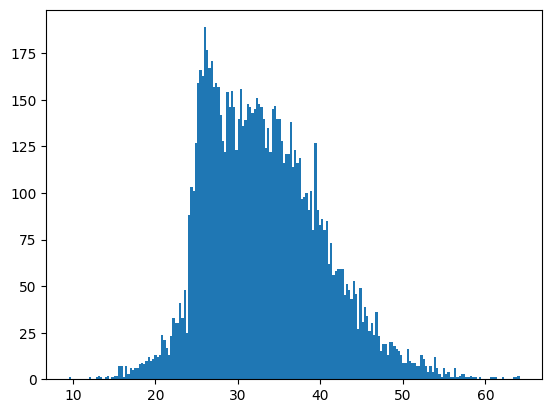

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOPS PER DOLLAR: 18 ##
-
## FLOPS HALVING RATE: 2.5 ##
-
## MAX FLOPS PER DOLLAR: 24 ##
-
## INITIAL PAY: 8.7 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
## SAMPLE RUN 1 ##
It takes 26.5 log FLOPs (~334 septillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~1 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOPs (~1 septillion) per 2022$USD.
We are willing to pay 8.7 log 2022$USD (~501 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.7 max log FLOP (500 septillion

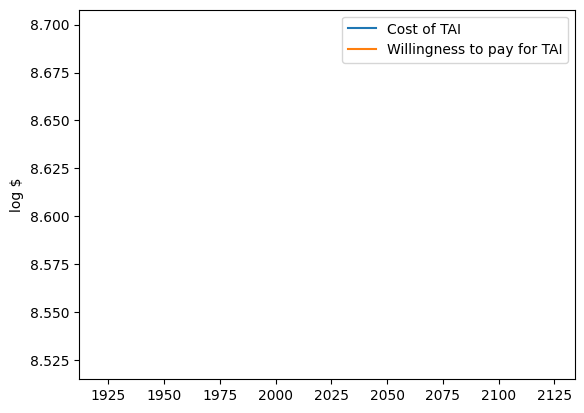

## SAMPLE RUN 2 ##
It takes 27.2 log FLOPs (~2 octillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~1 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOPs (~1 septillion) per 2022$USD.
We are willing to pay 8.7 log 2022$USD (~501 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.7 max log FLOP (500 septillion) available - TAI takes 27.2 log FLOP (2 octillion) - log $ 9.2 to buy TAI (2 billion) vs. willingness to pay log $ 8.7 (500 million) - 18.0 log FLOPS per $ (1000 quadrillion)
Year: 2024 - 26.9 max log FLOP (870 septillion) available - TAI takes 27.2 log FLOP (1 octillion) - log $ 9.0 to buy TAI (1 billion) vs. willingness to pay log $ 8

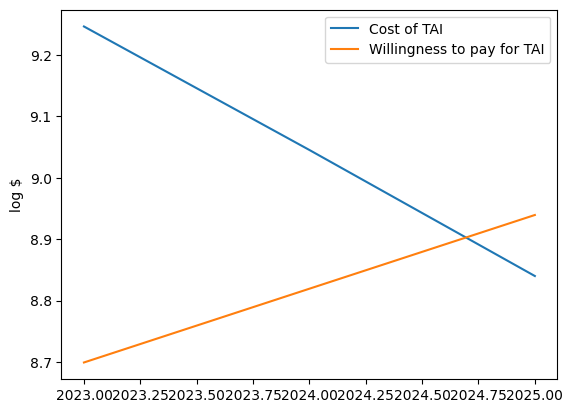

## SAMPLE RUN 3 ##
It takes 38.0 log FLOPs (~104 thousand decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~1 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOPs (~1 septillion) per 2022$USD.
We are willing to pay 8.7 log 2022$USD (~501 million) and this increases by 2.5x per year to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.7 max log FLOP (500 septillion) available - TAI takes 38.0 log FLOP (104 thousand decillion) - log $ 20.0 to buy TAI (104 quintillion) vs. willingness to pay log $ 8.7 (500 million) - 18.0 log FLOPS per $ (1000 quadrillion)
Year: 2024 - 26.9 max log FLOP (870 septillion) available - TAI takes 37.9 log FLOP (73 thousand decillion) - log $ 19.7 to buy TAI (56 

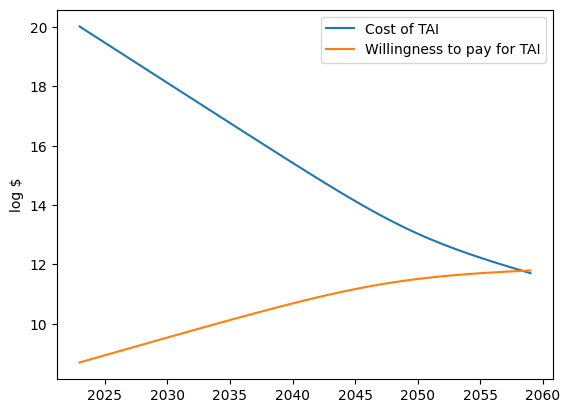

## FULL MODEL ##
Generating Bayes net with 6 cores...


10020it [01:57, 85.37it/s]                                                                            


Shuffling data...
Waiting for other cores...


100%|██████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 146.00it/s]

...Collected!
Caching in-memory...
...Cached!
Writing cache to file `caches/tai_years.sqcache`...
...Cached!
...Finding
...Found!
...All done!
['1%: 2023',
 '5%: 2023',
 '10%: 2023',
 '20%: 2024',
 '30%: 2029',
 '40%: 2034',
 '50%: 2040',
 '60%: 2045',
 '70%: 2055',
 '80%: 2067',
 '90%: >2123',
 '95%: >2123',
 '99%: >2123']
-
-
['1%: 0 years from now',
 '5%: 0 years from now',
 '10%: 0 years from now',
 '20%: 1 years from now',
 '30%: 6 years from now',
 '40%: 11 years from now',
 '50%: 17 years from now',
 '60%: 22 years from now',
 '70%: 32 years from now',
 '80%: 44 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now',
 '99%: >100 years from now']
-
-


In [3]:
run_timelines_model(variables, cores=6, runs=RUNS, dump_cache_file='caches/tai_years')